In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using KernelDensity
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP
using ForwardDiff

In [2]:
include("../utill.jl")

plot_projections (generic function with 1 method)

In [3]:
FPATH = "../../data/sampling_results/Benchmark-5/"

function marg_mean(name)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = unshaped(mean(smpl_tmp))
    return smpl_tmp
end

function marg_mean_shaped(name)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = mean(smpl_tmp)
    return smpl_tmp
end

function marg_std(name)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = unshaped(std(smpl_tmp))
    return smpl_tmp
end

function cov_matr(name)
    smpl_tmp = bat_read(FPATH*name)
    smp_fl, w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    smp_fl = smp_fl ./ std(smp_fl, FrequencyWeights(w), 2)
    smp_fl = smp_fl .- mean(smp_fl, FrequencyWeights(w), dims=2)
    cov_m = cov(smp_fl, FrequencyWeights(w), 2)
    return cov_m
end

cov_matr (generic function with 1 method)

In [4]:
β1 = 0.015
β2 = 0.0077 # (0.8/30/sqrt(12))
β3 = 0.0058 # (0.8/40/sqrt(12))

# flat prior for the pixel size
prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 4.0, 7.0), truncated(Normal(4.0, 2.0), 4.0, 7.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.50 .. 1.0 ,
        waist = [truncated(Normal(2.9, 0.03), 2.65, 3.5)],
        waist_2 = [truncated(Normal(2.9, 0.03), 2.65, 3.5)], # 11
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    )


labels = [L"\sigma_x", L"\sigma_y", L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", L"\sigma'_x", L"\sigma'_y", L"\alpha", L"s", L"s", 
    L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_y", L"\mu_y", L"\mu_y", L"\mu_y", 
    "ped", "lf", "a", "res x", "res y", "la", "la", "la"];

In [5]:
40*125.0

5000.0

In [6]:
smpl_tmp = bat_read(FPATH*"hc-2.hdf5")
smpl_tmp = varshape(prior).(smpl_tmp)
@show mode(smpl_tmp)[1]

(mode(smpl_tmp))[1] = (tr_size = [0.09022016247626924, 0.13278027377370621], tr_size_2 = [0.13087542193714233, 0.15158061149510935], ang_spr = [6.227488514589307, 5.755259786375036], ang_spr_2 = [2.6057915179686617, 2.397589287133589], mixt_pow = 0.666006673110822, waist = [3.1425423563421417], waist_2 = [2.8738232953734717], algmx = [31.741703234746318, 32.22277650028469, 21.291812547178893, 35.2540699308112], algmy = [36.930260443041675, 37.40757355716955, 20.25845816811686, 33.90824607487838], cam4_ped = 27.57169693775633, cam4_light_fluct = 1.365633716171961, cam4_light_amp = 8.846914204881422, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 4.827560766404559, cam4_resy = 4.7854307298949275, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.532172007081927, 11.430580961050259, 2.6946677414758087], s_cam = [0.0, 1.478, 15.026, 23.115])


(tr_size = [0.09022016247626924, 0.13278027377370621], tr_size_2 = [0.13087542193714233, 0.15158061149510935], ang_spr = [6.227488514589307, 5.755259786375036], ang_spr_2 = [2.6057915179686617, 2.397589287133589], mixt_pow = 0.666006673110822, waist = [3.1425423563421417], waist_2 = [2.8738232953734717], algmx = [31.741703234746318, 32.22277650028469, 21.291812547178893, 35.2540699308112], algmy = [36.930260443041675, 37.40757355716955, 20.25845816811686, 33.90824607487838], cam4_ped = 27.57169693775633, cam4_light_fluct = 1.365633716171961, cam4_light_amp = 8.846914204881422, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 4.827560766404559, cam4_resy = 4.7854307298949275, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.532172007081927, 11.430580961050259, 2.6946677414758087], s_cam = [0.0, 1.478, 15.026, 23.115])

In [7]:
filenames = readdir("../../data/sampling_results/Benchmark-5/")
images = load("../../data/experiment/dataset_2/m2/images-satur.jld2")
hc_mask = [i[1:3] == "hc-" for i in filenames]
hc_fnames = filenames[hc_mask]
hc_eind = parse.(Int64, [i[4:end-5] for i in hc_fnames])
hc_charge = images["charge"][hc_eind]
hc_runind = images["ev_ind"][hc_eind];

In [8]:
filenames = readdir("../../data/sampling_results/Benchmark-5/")
images = load("../../data/experiment/dataset_2/m1/images-satur.jld2")
lc_mask = [i[1:3] == "lc-" for i in filenames]
lc_fnames = filenames[lc_mask]
lc_eind = parse.(Int64, [i[4:end-5] for i in lc_fnames])
lc_charge = images["charge"][lc_eind]
lc_runind = images["ev_ind"][lc_eind];

In [9]:
fnames = [lc_fnames; hc_fnames]
charges = [lc_charge; hc_charge]
runind = [lc_runind ; hc_runind]
charges_n = charges ./ maximum(charges)
runind_n = runind ./ maximum(runind);

In [10]:
msklc = 1:length(lc_fnames)
mskhc = length(lc_fnames)+1:length(lc_fnames)+length(hc_fnames);

In [11]:
charges_n[sortperm(charges_n)] .= 1:length(charges_n)
charges_n = charges_n ./ maximum(charges_n);

In [12]:
# mean_params =  [marg_mean(i) for i in fnames[mskhc]]
# mean_matr = hcat(mean_params...);

In [13]:
mean_params =  [marg_mean_shaped(i) for i in fnames];

In [ ]:
# using JLD2

# tr_1_x = [i.tr_size[1] for i in mean_params]
# tr_1_y = [i.tr_size[2] for i in mean_params]
# tr_2_x = [i.tr_size_2[1] for i in mean_params]
# tr_2_y = [i.tr_size_2[2] for i in mean_params]
# as_1_x = [i.ang_spr[1] for i in mean_params]
# as_1_y = [i.ang_spr[2] for i in mean_params]
# as_2_x = [i.ang_spr_2[1] for i in mean_params]
# as_2_y = [i.ang_spr_2[2] for i in mean_params]
# w_1 = [i.waist[1] for i in mean_params]
# w_2 = [i.waist_2[1] for i in mean_params]

# data = (tr_1_x=tr_1_x, tr_1_y=tr_1_y, tr_2_x=tr_2_x, tr_2_y=tr_2_y, as_1_x=as_1_x, as_1_y=as_1_y, as_2_x=as_2_x, as_2_y=as_2_y, w_1=w_1, w_2=w_2)

# @save "../../data/sampling_results/Benchmark-5/alignment/alignment-summary-params.jld" data

In [14]:
x_event = Array{Float64,1}[]
y_event = Array{Float64,1}[]

n_events = length(mskhc)
n_cameras = 3

for i in eachindex(mean_params)[mskhc]
    push!(x_event, mean_params[i].algmx .* [mean_params[i].psx ; mean_params[i].cam4_psx] .* 10^-3)
    push!(y_event, mean_params[i].algmy .* [mean_params[i].psy ; mean_params[i].cam4_psy] .* 10^-3)
end

data = (x_event = x_event, y_event = y_event, s_cam = mean_params[1].s_cam[2:4]);

In [ ]:
@show charges[msklc]

In [ ]:
data.x_event

In [15]:
prior_ang = NamedTupleDist(
    θ = [10^-20 .. 10^-4 for i in 1:n_events],
    α = [0 .. 2*pi  for i in 1:n_events],
    x0 = [-5 .. 5 for i in 1:n_cameras],
    y0 = [-5 .. 5 for i in 1:n_cameras],
    σ_x = [10^-11 .. 0.2 for i in 1:n_cameras],
    σ_y = [10^-11 .. 0.2 for i in 1:n_cameras],
);

In [ ]:
function log_lik(; data = data, nevents = n_events)
    
    return params -> begin   
        ll = 0.0
        
        for i in 1:nevents
            x_expected = cos(params.α[i]).*tan(params.θ[i]).*data.s_cam.*10^3
            y_expected = sin(params.α[i]).*tan(params.θ[i]).*data.s_cam.*10^3
            
            ll += sum(logpdf.(Normal.(data.x_event[i][1] .+ params.x0 .+ x_expected, params.σ_x), data.x_event[i][2:4]))
            ll += sum(logpdf.(Normal.(data.y_event[i][1] .+ params.y0  .+ y_expected, params.σ_y), data.y_event[i][2:4]))
        end
        return LogDVal(ll)
    end
        
end

log_likelihood = log_lik()

In [ ]:
posterior = PosteriorDensity(log_likelihood, prior_ang);

In [ ]:
posterior_is = bat_transform(PriorToGaussian(), posterior, PriorSubstitution()).result

iters = 60000
iters_warmup = 1200
chains = 5

metric = BAT.DiagEuclideanMetric()
integrator = BAT.LeapfrogIntegrator(0.0)

proposal = BAT.NUTS(:MultinomialTS, :ClassicNoUTurn)
# proposal = BAT.FixedTrajectoryLength()

adaptor = BAT.StanHMCAdaptor(0.8, iters_warmup)
# adaptor = BAT.StepSizeAdaptor()

ahmc_sampler = HamiltonianMC(metric, ForwardDiff, integrator, proposal, adaptor);

In [ ]:
@time samples_is = bat_sample(posterior_is, iters, MCMCSampling(sampler = ahmc_sampler, nchains = chains));

In [ ]:
samples = samples_is.result;

In [ ]:
trafo_is = trafoof(posterior_is.likelihood)
samples = inv(trafo_is).(samples);

In [ ]:
# BAT.bat_write("../../data/sampling_results/Benchmark-5/alignment/hc-samples.hdf5", unshaped.(samples))

In [ ]:
# @save "../../data/sampling_results/Benchmark-5/alignment/hc-data.hdf5" data

In [ ]:
# samples = samples_tot.result;

In [ ]:
# minimum(bat_eff_sample_size(unshaped.(samples)).result)

In [16]:
samples = bat_read("../../data/sampling_results/Benchmark-5/alignment/hc-samples.hdf5")
samples = varshape(prior_ang).(samples);

In [17]:
sz = size(flatview(unshaped.(samples.v)))

(74, 60000)

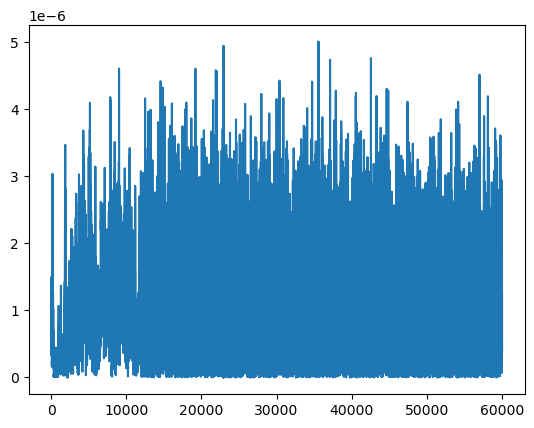

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9d550d4790>

In [18]:
plot(flatview(unshaped.(samples.v))[3,:])

In [40]:
function cov_matr(smpl_tmp)
    smp_fl, w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    smp_fl = smp_fl ./ std(smp_fl, FrequencyWeights(w), 2)
    smp_fl = smp_fl .- mean(smp_fl, FrequencyWeights(w), dims=2)
    cov_m = cov(smp_fl, FrequencyWeights(w), 2)
    return cov_m
end

cov_matr (generic function with 1 method)

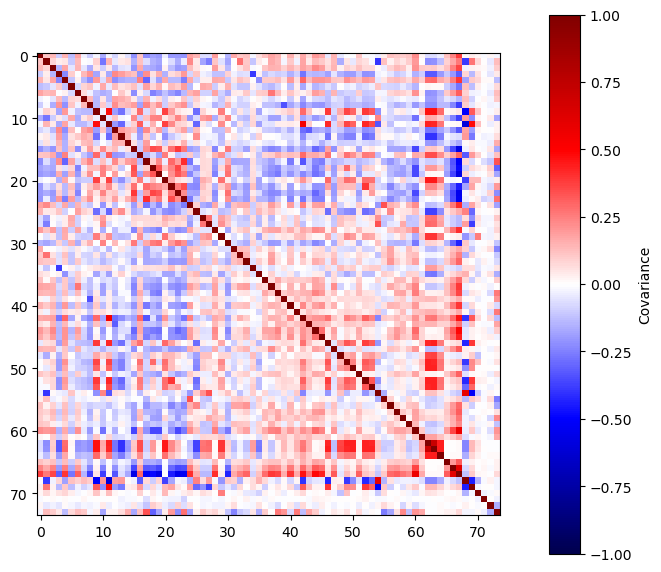

In [49]:
covm = cov_matr(samples);

fig, (ax, ax2) = plt.subplots(1,2, figsize=(7,7), gridspec_kw=Dict("width_ratios"=>[15,1]))

max = maximum(abs.(covm))

cb = ax.imshow(covm,  origin="upper", cmap="seismic", vmin=-max, vmax=max, aspect="equal") 
fig.colorbar(cb, spacing="proportional", label="Covariance", cax=ax2)

# ax.set_yticks(0:26)
# ax.set_yticklabels(labels)

# ax.set_xticks(0:26)
# ax.set_xticklabels(labels, rotation = 90);

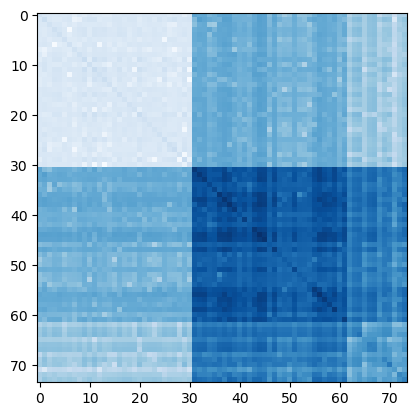

PyObject <matplotlib.image.AxesImage object at 0x7f9d54c77d90>

In [19]:
x = flatview(unshaped.(samples.v))'

plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [ ]:
#  27.1, 21.6, 114.0, 30.5, 23.4, 125.0, 121.8, 120.0

In [20]:
param_mode = mode(samples)

ShapedAsNT((θ = [5.402447438107673e-7, 1.360607019016734e-7, 1.67110267452987e-8, 3.2281031115855196e-6, 1.5913626344308006e-6, 1.9044308353751918e-6, 1.1340304273628041e-6, 8.772682672579891e-7, 1.93965528735616e-6, 1.9712861929366698e-6  …  1.2360339920808396e-5, 1.3619464946720494e-5, 1.2922997313341783e-5, 1.321651493789391e-6, 2.7609543446604843e-7, 1.1877896884496707e-6, 2.787648858787169e-6, 1.6329644091183634e-6, 8.807002977608671e-6, 1.6964512399322017e-6], α = [5.931781792766536, 4.881869333930187, 1.2819623432874767, 0.7773691199162267, 3.9222523794616513, 2.6699429882790335, 0.10186173536880212, 1.978508242264861, 0.791550337221569, 2.766567379335487  …  1.746639448606334, 1.8339880524070638, 1.564715717640371, 3.7235789524446092, 6.069453693203752, 2.5087531863196957, 2.7970189351070665, 3.1961303426752523, 3.1731140453785964, 2.043124173902368], x0 = [-0.1661485203030919, 1.5255947226623316, 3.3751770922196513], y0 = [-0.24819558835490252, 1.4051536124773438, 2.9263710433

In [21]:
bat_marginalmode(samples).result

ShapedAsNT((θ = [8.75e-7, 1.925e-6, 2.5e-8, 2.575e-6, 1.925e-6, 1.75e-7, 2.5e-8, 2.75e-7, 1.375e-6, 4.075e-6  …  1.2375e-5, 1.2575e-5, 1.2624999999999999e-5, 1.525e-6, 9.75e-7, 2.5e-8, 1.9749999999999997e-6, 8.249999999999999e-7, 8.575e-6, 1.425e-6], α = [5.824999999999999, 6.025, 3.575, 0.675, 3.925, 2.775, 5.725, 0.175, 0.575, 3.125  …  1.8675000000000002, 1.7375, 1.5175, 5.625, 6.025, 2.875, 3.025, 4.074999999999999, 3.2475, 2.175], x0 = [-0.166575, 1.52875, 3.3935], y0 = [-0.24895, 1.4107500000000002, 2.94175], σ_x = [0.002375, 0.02325, 0.0955], σ_y = [0.007725, 0.03275, 0.00425]))

In [22]:
mean(samples)[1]

(θ = [9.983182963099373e-7, 2.1672768297246105e-6, 8.96733791513296e-7, 2.6837143856809614e-6, 2.0793744075839953e-6, 8.785312961384402e-7, 9.186498769430345e-7, 7.746500642239154e-7, 1.3247027886589291e-6, 4.052530193402924e-6  …  1.238801228430396e-5, 1.2726671773572707e-5, 1.2686248014603118e-5, 1.4419745375159237e-6, 1.5060485535990438e-6, 1.1264991975687997e-6, 2.076968440109244e-6, 9.246399315527238e-7, 8.431779638723685e-6, 1.2556275833019485e-6], α = [4.3221384678523, 5.356541847897364, 3.922889306769197, 0.8696627238284377, 4.116253319561952, 2.3804385662059637, 4.185090233182098, 2.7283725778004064, 1.3974639306498775, 3.060589460075669  …  1.8602200773749682, 1.7193778537393365, 1.5109329742901623, 4.846488045445455, 4.704767910179545, 2.874752895563735, 2.9439799436217386, 4.218280005148923, 3.24933399789114, 1.9684542084329257], x0 = [-0.16651523322402198, 1.5278985995075824, 3.3930412099886857], y0 = [-0.24889482457198817, 1.409833624030112, 2.938269898739936], σ_x = [0.0

In [23]:
std(samples)[1]

(θ = [6.554485710506846e-7, 1.1836367104433482e-6, 6.469303532081071e-7, 8.800865991861051e-7, 8.062235070712502e-7, 6.885852577857118e-7, 6.937808259277876e-7, 6.283826116070771e-7, 7.494760086897662e-7, 1.385072633820691e-6  …  6.844593069620782e-7, 6.188448515391518e-7, 6.264233349994905e-7, 7.204711639077769e-7, 9.998633028646172e-7, 8.656124283931669e-7, 1.2029563917795997e-6, 6.225302031583186e-7, 1.244985594697134e-6, 6.665941098452032e-7], α = [1.423166505415037, 1.4286057362207296, 1.3594192570324841, 0.48133492057811916, 0.583047026299179, 1.6622896958271727, 1.7898731015841363, 2.0464019597338154, 1.2272369355234112, 0.2585348783293318  …  0.09949422497437163, 0.09348544056061323, 0.11807016127371926, 1.1163013115446785, 1.950733991528265, 1.1872503444942468, 0.6964558626097612, 1.3666566061410352, 0.07484078000843075, 1.0104742156065223], x0 = [0.000823424603473708, 0.008283710943609175, 0.020569383132148015], y0 = [0.0015351899927631319, 0.00802633706474458, 0.008153107112

In [24]:
#  findmode_result = bat_findmode(posterior, MaxDensityLBFGS(init = InitFromTarget()), )

findmode_result = bat_findmode(
    posterior, 
    MaxDensityLBFGS(init = ExplicitInit([param_mode],)), 
)

fit_par_values = findmode_result.result

LoadError: UndefVarError: posterior not defined

In [ ]:
# @save "../../data/sampling_results/Benchmark-5/alignment/hc-data.jld2" data fit_par_values

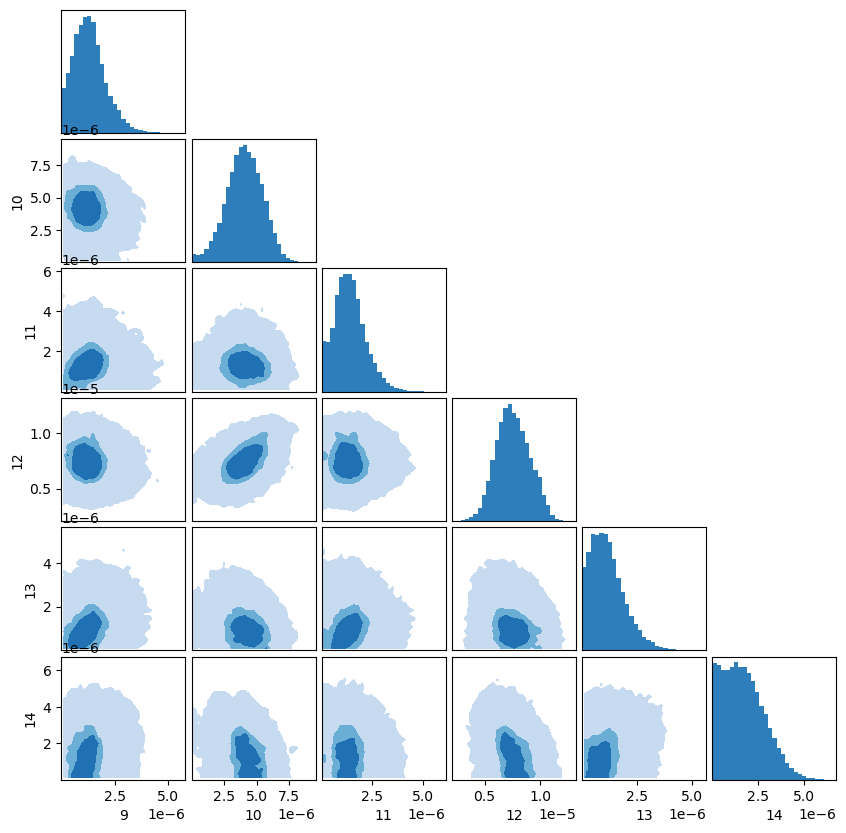

In [38]:
dims = 9:14
# dims = [1,2,3,4,5,]
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 30

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

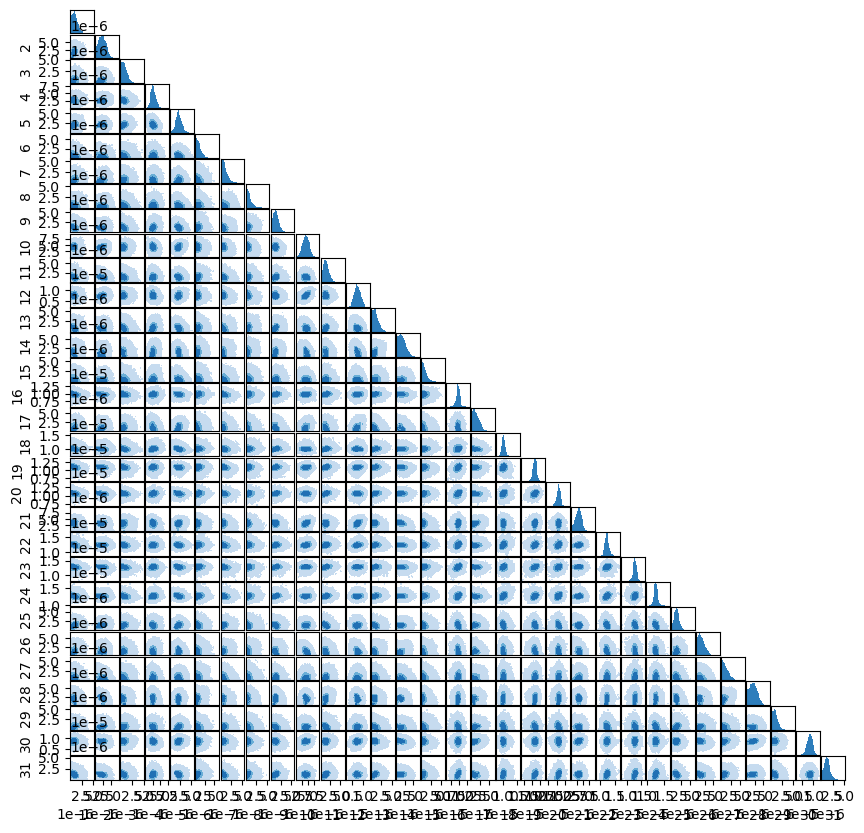

In [29]:
dims = 1:n_events
# dims = [1,2,3,4,5,]
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 30

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
dims = n_events+1:2*n_events
# dims = [1,2,3,4,5,]
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 25

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

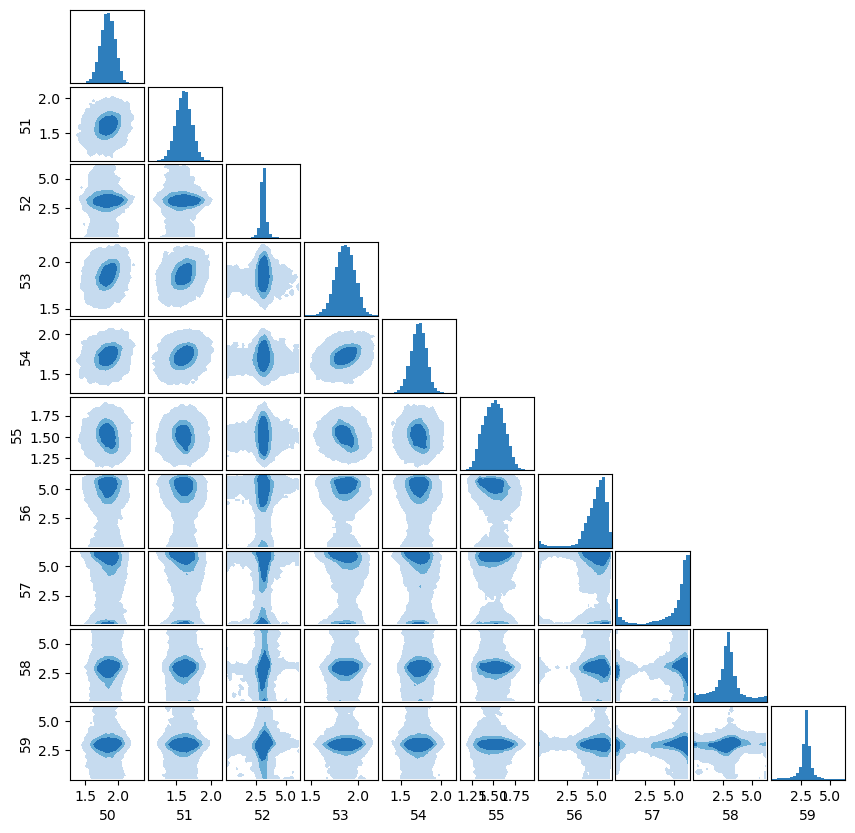

In [35]:
dims = 50:59
# dims = [1,2,3,4,5,]
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 25

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
dims = collect(sz[1]-11:sz[1]-6)
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.95, 1,]
figsize = (10,10)
n_bins = 25

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [ ]:
dims = collect(sz[1]-5:sz[1])
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 25

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)